In [58]:
import os
import numpy as np
from astropy.io import fits
from astropy.nddata import bitmask, block_reduce
from astropy.utils.data import get_pkg_data_filename
from acstools.findsat_mrt import TrailFinder

In [59]:
image_file = get_pkg_data_filename('./Data/fits/tic28.fit')
image = fits.getdata(image_file, ext=0)
image = image - np.nanmedian(image)
image = block_reduce(image, 8, func=np.nansum)

s = TrailFinder(image, processes=2,threshold=2,min_length=100, min_persistence=0.3, max_width=30)
#threshold = min snr as i see#1, but not at all #2
s.run_mrt()
print("mrt sources")
s.find_mrt_sources()
print("sources")
s.filter_sources(trim_catalog=True,plot_streak=False) #plot_streak=False
s.make_mask()
s.save_output()
print("source list (filter_sources):")
display(s.source_list[s.source_list['persistence']>0.1])

INFO:utils_findsat_mrt:Calculating median Radon Transform with 2 processes
INFO:findsat_mrt:Detection threshold: 2
INFO:findsat_mrt:Using kernel c:\Python310\lib\site-packages\acstools\data\rt_line_kernel_width15.fits


mrt sources


c:\Python310\lib\site-packages\photutils\detection\starfinder.py:324: RuntimeWarning: invalid value encountered in divide
  return moments / self.moments[:, 0, 0][:, np.newaxis, np.newaxis]
c:\Python310\lib\site-packages\photutils\detection\starfinder.py:315: RuntimeWarning: divide by zero encountered in log10
  return -2.5 * np.log10(self.flux)
INFO:findsat_mrt:{no} sources found using kernel: 6
INFO:findsat_mrt:4 sources found using kernel
INFO:findsat_mrt:Using kernel c:\Python310\lib\site-packages\acstools\data\rt_line_kernel_width7.fits
c:\Python310\lib\site-packages\photutils\detection\starfinder.py:324: RuntimeWarning: invalid value encountered in divide
  return moments / self.moments[:, 0, 0][:, np.newaxis, np.newaxis]
c:\Python310\lib\site-packages\photutils\detection\starfinder.py:315: RuntimeWarning: divide by zero encountered in log10
  return -2.5 * np.log10(self.flux)
INFO:findsat_mrt:{no} sources found using kernel: 6
INFO:findsat_mrt:3 sources found using kernel
INFO:f

sources


INFO:utils_findsat_mrt:amplitude of feature: -315.231881323949
baseline noise: 944.0104392472225
snr of feature = -1.3339283849184156
INFO:utils_findsat_mrt:width of feature = 16.306031689273794
INFO:utils_findsat_mrt:amplitude of feature: 2398.514225430936
baseline noise: 459.4704390020748
snr of feature = 4.220170922508696
INFO:utils_findsat_mrt:width of feature = 42.554867553468924
INFO:findsat_mrt:Wrote diagnostic plot to .\_diagnostic.png
INFO:findsat_mrt:wrote catalog .\_catalog.fits


source list (filter_sources):


id,xcentroid,ycentroid,fwhm,roundness,pa,max_value,flux,mag,theta,rho,endpoints,status,mean flux,width,snr,persistence
int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,"float64[2,2]",int32,float64,float64,float64,float64
1,0.0,196.63076923076923,0.8035759284750895,1.0,90.0,0.7031237401234838,1.1147083684884498,-0.11790315383609798,0.0,-214.86923076923077,75.63076923076923 .. 439.0,2,4013.756719545768,11.795100068386347,11.676550638342617,0.5


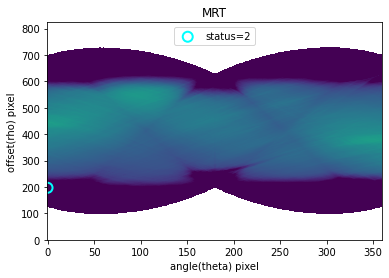

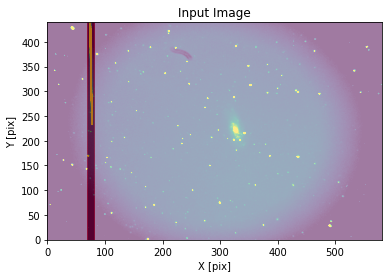

In [60]:
s.plot_mrt(show_sources=True)      # plots MRT with sources overlaid
s.plot_image(overlay_mask=True)    # plots input image with mask overlaid